# Mini Projeto - Roof Imóveis



### DEx 3 Grupo 01: André Alves, Bruna Beatriz Madeira, Bruna Calistrate, Filipe Oliveira, Gabriel Shinzato, Mário Vasconcelos, Maurício Jornada Bastos, Paulo Vitor de Souza Santos, Renan D'Oüro C. Gomes

### Contextualização

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, ela contratou você, para uma consultoria estratégica.

A empresa irá investir em imóveis no Condado de County, nos Estados
Unidos.

Utilizando o dataset disponibilizado, você irá aplicar os conceitos de CRISP-DM aprendidos até o momento em um projeto prático, que busca desenvolver seu pensamento analítico, insights e tomada de decisões.

### Questão de negócio

Quais são os 5 melhores imóveis que a Roof Imóveis deveria investir e quais 5 não são recomendados de jeito nenhum?


#### Meta
Determinar o melhor custo benefício para aquisição de 5 imóveis no Condado de King

#### Como
A partir de métricas (a serem determinadas abaixo) e estudo do histórico de comprae venda de imóveis de diversos perfis no Condado e assim determinar sua "vendabilidade"

### Entendimento do Negócio

Importar os dados e realizar o seu tratamento.

#### Importação dos dados

Vamos baixá-los diretamente para não correr o risco de perdê-los por algum motivo, ao invés de importar diretamente do Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive') 


Mounted at /content/drive


In [ ]:
df_roof = pd.read_csv('/content/drive/MyDrive/DNC_Deliverable/kc_house_data.csv')

In [ ]:
df_roof

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Analizando os dados

In [ ]:
df_roof.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_roof.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Tratamento de dados

In [ ]:
df_roof.rename(columns={'date': 'Data', 'price': 'Preço', 'bedrooms': 'Quartos', 
                        'bathrooms': 'Banheiros', 'sqft_living': 'ÁreaHab', 
                        'sqft_lot': 'ÁreaTot', 'floors': 'Andares', 
                        'waterfront': 'Beira-Mar', 'view': 'Vista', 
                        'condition': 'Condição', 'grade': 'QualidadeConst',
                        'sqft_above': 'ÁreaSup', 'sqft_basement': 'ÁreaInf',
                        'yr_built': 'AnoConst', 'yr_renovated': 'AnoRenov',
                        'zipcode': 'CEP', 'lat': 'Lat', 'long': 'Long', 
                        'sqft_living15': 'ÁreaHab15', 'sqft_lot15': 'ÁreaTot15'}, inplace=True)

In [ ]:
df_roof[['ÁreaHab', 'ÁreaTot', 'ÁreaSup', 
         'ÁreaInf', 'ÁreaHab15', 'ÁreaTot15']] = df_roof[['ÁreaHab', 'ÁreaTot', 'ÁreaSup', 
                                                          'ÁreaInf', 'ÁreaHab15', 'ÁreaTot15']].apply(lambda x: round(x / 10.764))

In [ ]:
df_roof = df_roof.astype({'Data': 'datetime64[ns]'})
df_roof['Banheiros'] = df_roof['Banheiros'].apply(lambda x: round(x))

In [ ]:
for c in range(len(df_roof['Data'])):
  df_roof['IdadeVenda'] = df_roof['Data'][c].year - df_roof['AnoConst'] 

In [ ]:
df_roof

,id,Data,Preço,Quartos,Banheiros,ÁreaHab,ÁreaTot,Andares,Beira-Mar,Vista,Condição,QualidadeConst,ÁreaSup,ÁreaInf,AnoConst,AnoRenov,CEP,Lat,Long,ÁreaHab15,ÁreaTot15,IdadeVenda
0,7129300520,2014-10-13,221900.0,3,1,110.0,525.0,1.0,0,0,3,7,110.0,0.0,1955,0,98178,47.5112,-122.257,124.0,525.0,59
1,6414100192,2014-12-09,538000.0,3,2,239.0,673.0,2.0,0,0,3,7,202.0,37.0,1951,1991,98125,47.7210,-122.319,157.0,710.0,63
2,5631500400,2015-02-25,180000.0,2,1,72.0,929.0,1.0,0,0,3,6,72.0,0.0,1933,0,98028,47.7379,-122.233,253.0,749.0,81
3,2487200875,2014-12-09,604000.0,4,3,182.0,465.0,1.0,0,0,5,7,98.0,85.0,1965,0,98136,47.5208,-122.393,126.0,465.0,49
4,1954400510,2015-02-18,510000.0,3,2,156.0,751.0,1.0,0,0,3,8,156.0,0.0,1987,0,98074,47.6168,-122.045,167.0,697.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,142.0,105.0,3.0,0,0,3,8,142.0,0.0,2009,0,98103,47.6993,-122.346,142.0,140.0,5
21609,6600060120,2015-02-23,400000.0,4,2,215.0,540.0,2.0,0,0,3,8,215.0,0.0,2014,0,98146,47.5107,-122.362,170.0,669.0,0
21610,1523300141,2014-06-23,402101.0,2,1,95.0,125.0,2.0,0,0,3,7,95.0,0.0,2009,0,98144,47.5944,-122.299,95.0,186.0,5
21611,291310100,2015-01-16,400000.0,3,2,149.0,222.0,2.0,0,0,3,8,149.0,0.0,2004,0,98027,47.5345,-122.069,131.0,120.0,10


In [ ]:
df_roof.dtypes

id                         int64
Data              datetime64[ns]
Preço                    float64
Quartos                    int64
Banheiros                  int64
ÁreaHab                  float64
ÁreaTot                  float64
Andares                  float64
Beira-Mar                  int64
Vista                      int64
Condição                   int64
QualidadeConst             int64
ÁreaSup                  float64
ÁreaInf                  float64
AnoConst                   int64
AnoRenov                   int64
CEP                        int64
Lat                      float64
Long                     float64
ÁreaHab15                float64
ÁreaTot15                float64
IdadeVenda                 int64
dtype: object

In [ ]:
df_roof.describe()

,id,Preço,Quartos,Banheiros,ÁreaHab,ÁreaTot,Andares,Beira-Mar,Vista,Condição,QualidadeConst,ÁreaSup,ÁreaInf,AnoConst,AnoRenov,CEP,Lat,Long,ÁreaHab15,ÁreaTot15,IdadeVenda
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.058715,193.227548,1403.477120,1.494309,0.007542,0.234303,3.409430,7.656873,166.143247,27.080692,1971.005136,84.402258,98077.939805,47.560053,-122.213896,184.558321,1186.228474,42.994864
std,2.876566e+09,3.671272e+05,0.930062,0.755524,85.328215,3848.056782,0.539989,0.086517,0.766318,0.650743,1.175459,76.938148,41.112480,29.373411,401.679240,53.505026,0.138564,0.140828,63.678507,2536.614514,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,27.000000,48.000000,1.000000,0.000000,0.000000,1.000000,1.000000,27.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,37.000000,60.000000,-1.000000
25%,2.123049e+09,3.219500e+05,3.000000,2.000000,133.000000,468.000000,1.000000,0.000000,0.000000,3.000000,7.000000,111.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,138.000000,474.000000,17.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,177.000000,708.000000,1.500000,0.000000,0.000000,3.000000,7.000000,145.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,171.000000,708.000000,39.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,237.000000,993.000000,2.000000,0.000000,0.000000,4.000000,8.000000,205.000000,52.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,219.000000,937.000000,63.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1258.000000,153415.000000,3.500000,1.000000,4.000000,5.000000,13.000000,874.000000,448.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,577.000000,80936.000000,114.000000


Análise de dos dados

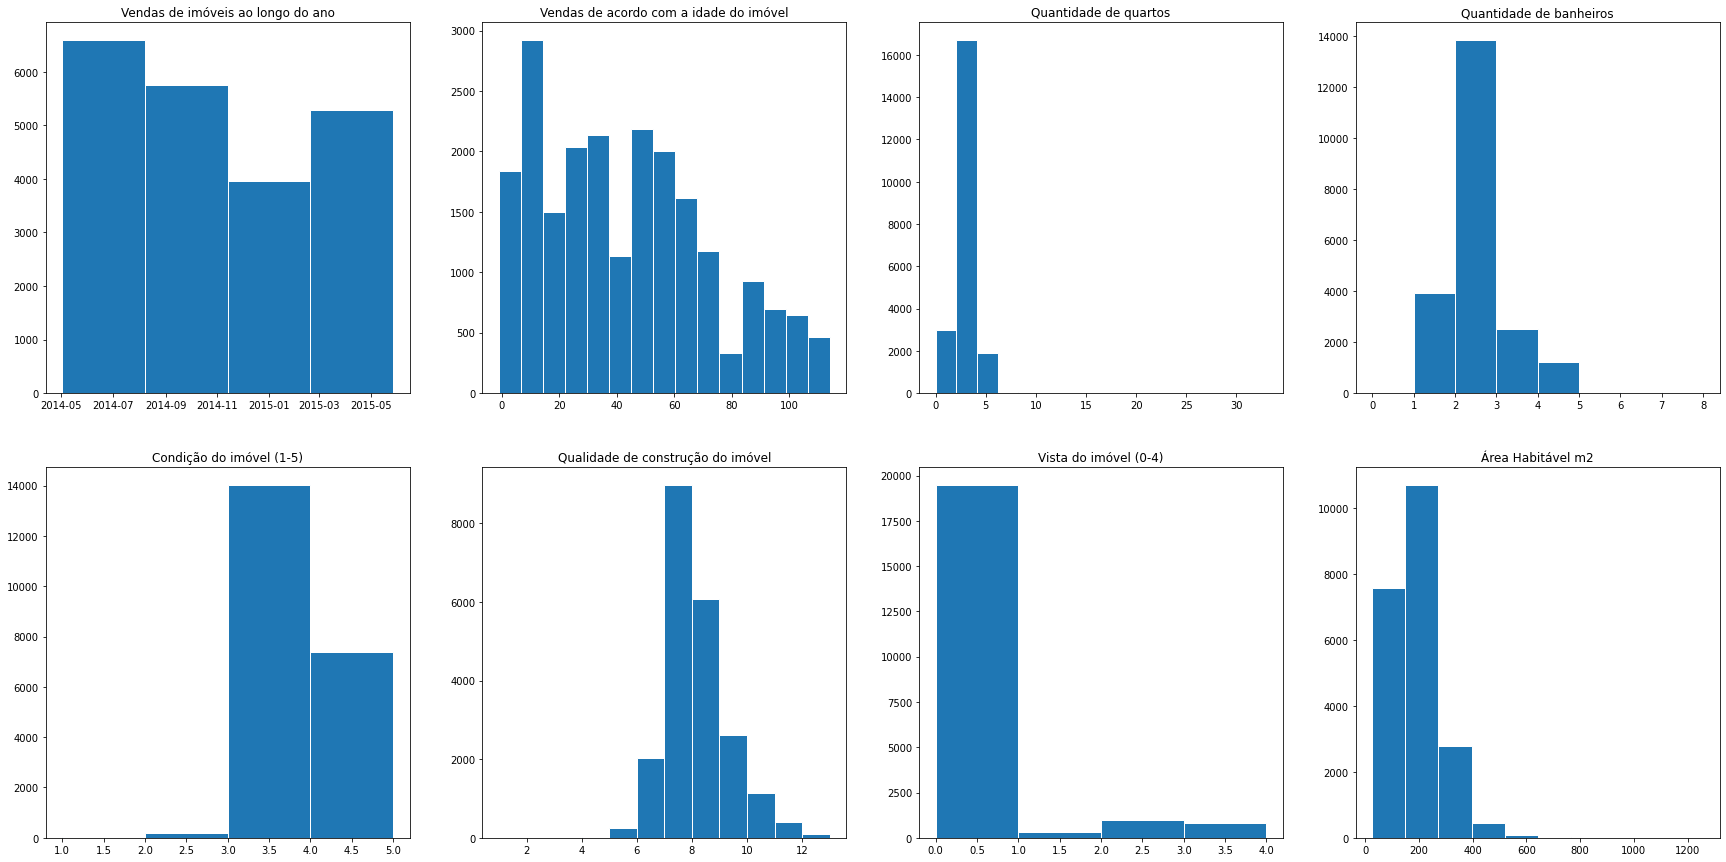

In [ ]:
fig, ax = plt.subplots(2, 4,figsize=[30,15])

ax[0,0].hist(df_roof['Data'], bins=4, edgecolor='white')
ax[0,0].set_title("Vendas de imóveis ao longo do ano")

# fazer correlação com as reformas
ax[0,1].hist(df_roof['IdadeVenda'], bins=15, edgecolor='white')
ax[0,1].set_title("Vendas de acordo com a idade do imóvel")

ax[0,2].hist(df_roof['Quartos'], bins=16, edgecolor='white')
ax[0,2].set_title("Quantidade de quartos")

ax[0,3].hist(df_roof['Banheiros'], bins=8, edgecolor='white')
ax[0,3].set_title("Quantidade de banheiros")

ax[1,0].hist(df_roof['Condição'], bins=4,edgecolor='white')
ax[1,0].set_title("Condição do imóvel (1-5)")

ax[1,1].hist(df_roof['QualidadeConst'], bins=12,edgecolor='white')
ax[1,1].set_title("Qualidade de construção do imóvel")

ax[1,2].hist(df_roof['Vista'], bins=4,edgecolor='white')
ax[1,2].set_title("Vista do imóvel (0-4)")

ax[1,3].hist(df_roof['ÁreaHab'], edgecolor='white')
ax[1,3].set_title("Área Habitável m2")

#plt.title("Distribuição das vendas de imóveis ao longo do ano", loc='center')
#plt.xlabel("Ano-Mês")
#plt.ylabel('Qtd de Imóveis Vendidos')

plt.show()

In [ ]:
# seleção das variáveis numéricas pra fazer uma correlação mais rápida e intuitiva

num_corr = df_roof[['Preço', 'Quartos', 'ÁreaHab', 'ÁreaTot', 
                    'Beira-Mar', 'Vista', 'Condição', 'QualidadeConst', 
                    'ÁreaHab15', 'ÁreaTot15', 'IdadeVenda']]
num_corr

,Preço,Quartos,ÁreaHab,ÁreaTot,Beira-Mar,Vista,Condição,QualidadeConst,ÁreaHab15,ÁreaTot15,IdadeVenda
0,221900.0,3,110.0,525.0,0,0,3,7,124.0,525.0,59
1,538000.0,3,239.0,673.0,0,0,3,7,157.0,710.0,63
2,180000.0,2,72.0,929.0,0,0,3,6,253.0,749.0,81
3,604000.0,4,182.0,465.0,0,0,5,7,126.0,465.0,49
4,510000.0,3,156.0,751.0,0,0,3,8,167.0,697.0,27
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,142.0,105.0,0,0,3,8,142.0,140.0,5
21609,400000.0,4,215.0,540.0,0,0,3,8,170.0,669.0,0
21610,402101.0,2,95.0,125.0,0,0,3,7,95.0,186.0,5
21611,400000.0,3,149.0,222.0,0,0,3,8,131.0,120.0,10


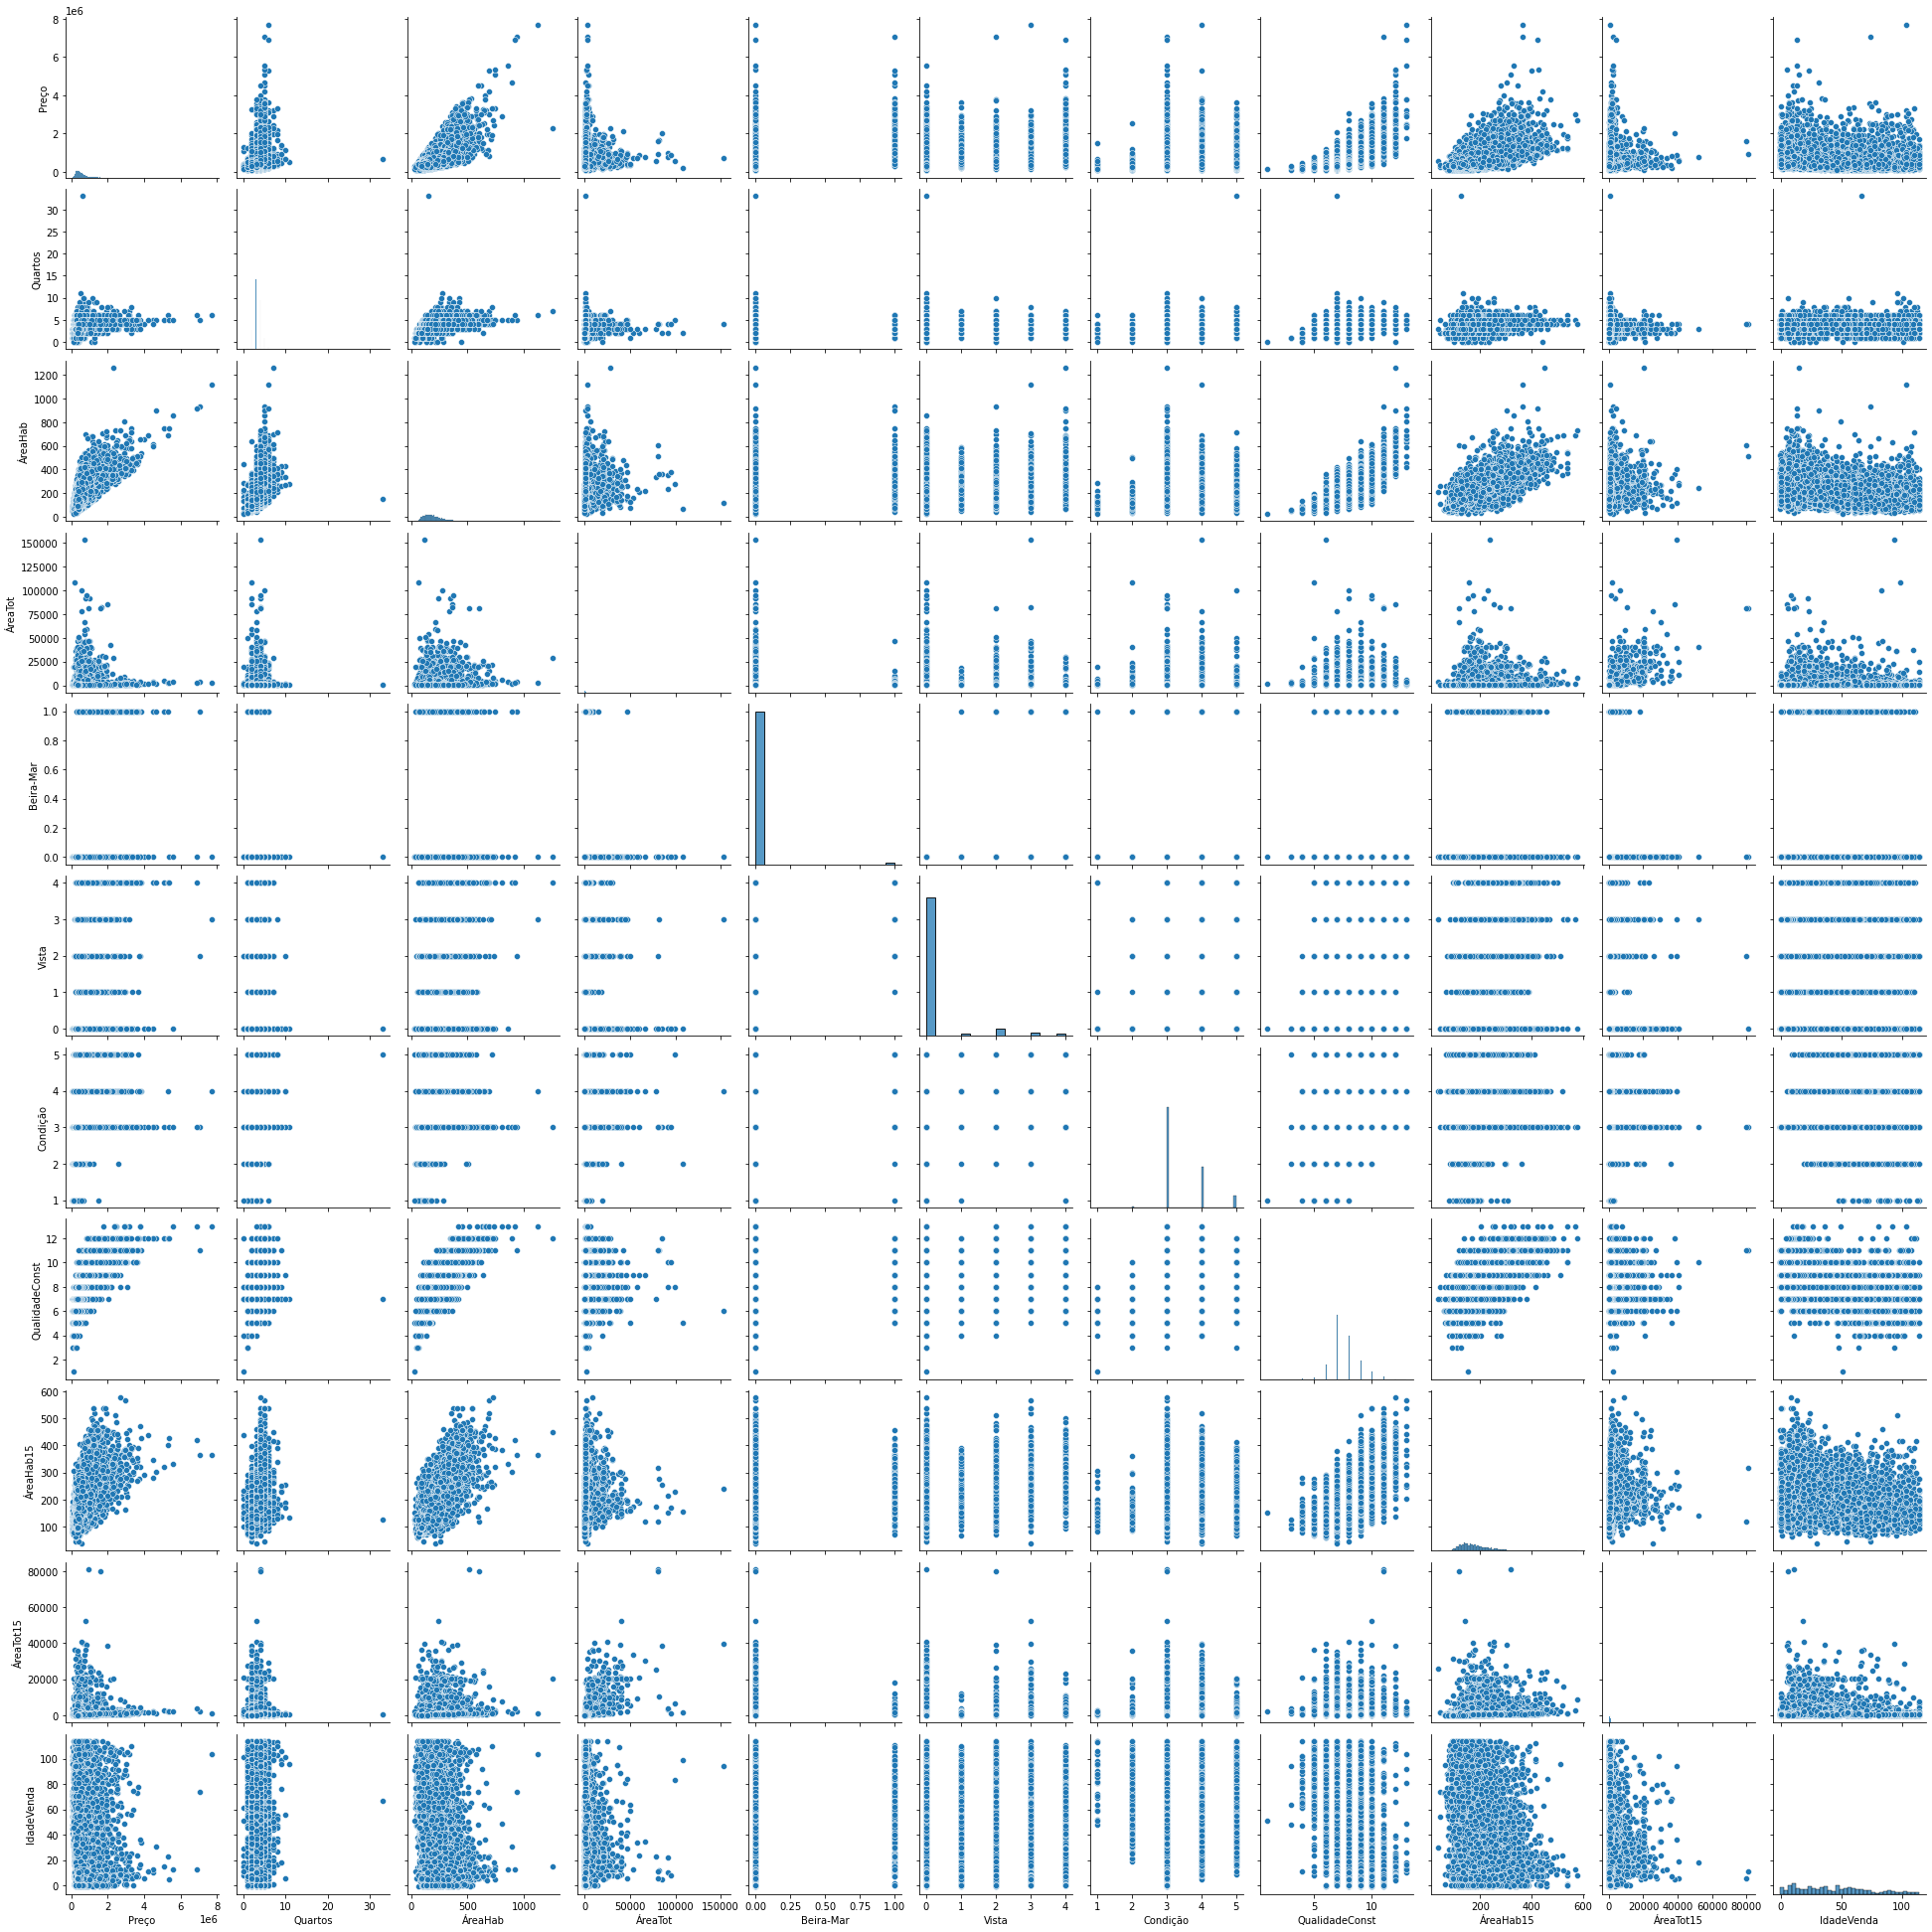

In [ ]:
sns.pairplot(num_corr)

In [ ]:
num_corr.corr()

,Preço,Quartos,ÁreaHab,ÁreaTot,Beira-Mar,Vista,Condição,QualidadeConst,ÁreaHab15,ÁreaTot15,IdadeVenda
Preço,1.000000,0.308350,0.702018,0.089662,0.266369,0.397293,0.036362,0.667434,0.585378,0.082449,-0.054012
Quartos,0.308350,1.000000,0.576684,0.031704,-0.006582,0.079532,0.028472,0.356967,0.391649,0.029243,-0.154178
ÁreaHab,0.702018,0.576684,1.000000,0.172813,0.103818,0.284624,-0.058750,0.762683,0.756423,0.183279,-0.318034
ÁreaTot,0.089662,0.031704,0.172813,1.000000,0.021603,0.074710,-0.008957,0.113621,0.144649,0.718556,-0.053079
Beira-Mar,0.266369,-0.006582,0.103818,0.021603,1.000000,0.401857,0.016653,0.082775,0.086498,0.030703,0.026161
Vista,0.397293,0.079532,0.284624,0.074710,0.401857,1.000000,0.045990,0.251321,0.280454,0.072575,0.053440
Condição,0.036362,0.028472,-0.058750,-0.008957,0.016653,0.045990,1.000000,-0.144674,-0.092830,-0.003403,0.361417
QualidadeConst,0.667434,0.356967,0.762683,0.113621,0.082775,0.251321,-0.144674,1.000000,0.713191,0.119248,-0.446963
ÁreaHab15,0.585378,0.391649,0.756423,0.144649,0.086498,0.280454,-0.092830,0.713191,1.000000,0.183220,-0.326187
ÁreaTot15,0.082449,0.029243,0.183279,0.718556,0.030703,0.072575,-0.003403,0.119248,0.183220,1.000000,-0.070953


In [ ]:
# tentativa de mapa, mas demora muito a carregar

import plotly.graph_objects as go

fig = go.Figure(
    data=go.Scattergeo(
        locationmode='USA-states',
        lon= df_roof['Long'],
        lat=df_roof['Lat'],
        mode= 'markers',
        marker= dict(
            size = 1,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle'
        ),
        #colorscale = 'Blues',
    )    
)

fig.update_layout(
    title='Distribuições das casas dentro do Condado King',
    geo= dict(
        scope='usa',
        showland = True,
        landcolor = "rgb(250,250,250)",
        subunitcolor= "rgb(217,217,217)"
    )
)


fig.show()

In [ ]:
df_roof['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64